### Positive Changes
Find max positive change in 2 consecutive seconds for both consumption and PV

In [1]:
rm(list = ls())
require(R.matlab)

load("../../Data/Generated Data/1 - Secondly/cons_seg.Rdata") # secondly gen  data for days analyzed in 1st script (gen.all)
load("../../Data/Generated Data/1 - Secondly/gen_seg.Rdata")  # secondly cons data for days analyzed in 1st script (cons.all)

Loading required package: R.matlab
R.matlab v3.6.1 (2016-10-19) successfully loaded. See ?R.matlab for help.

Attaching package: 'R.matlab'

The following objects are masked from 'package:base':

    getOption, isOpen



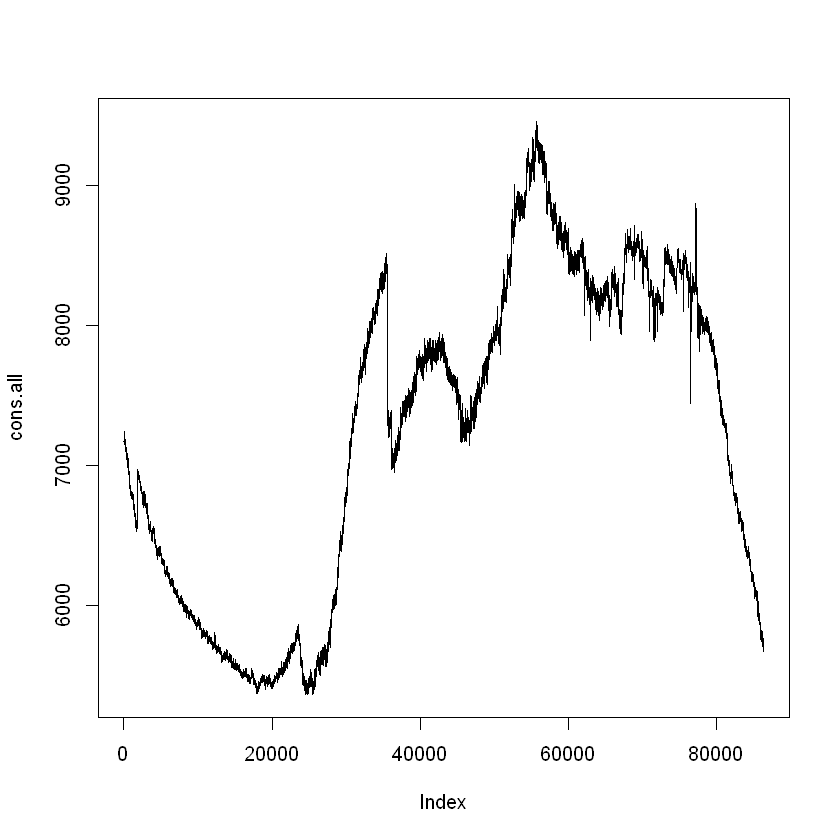

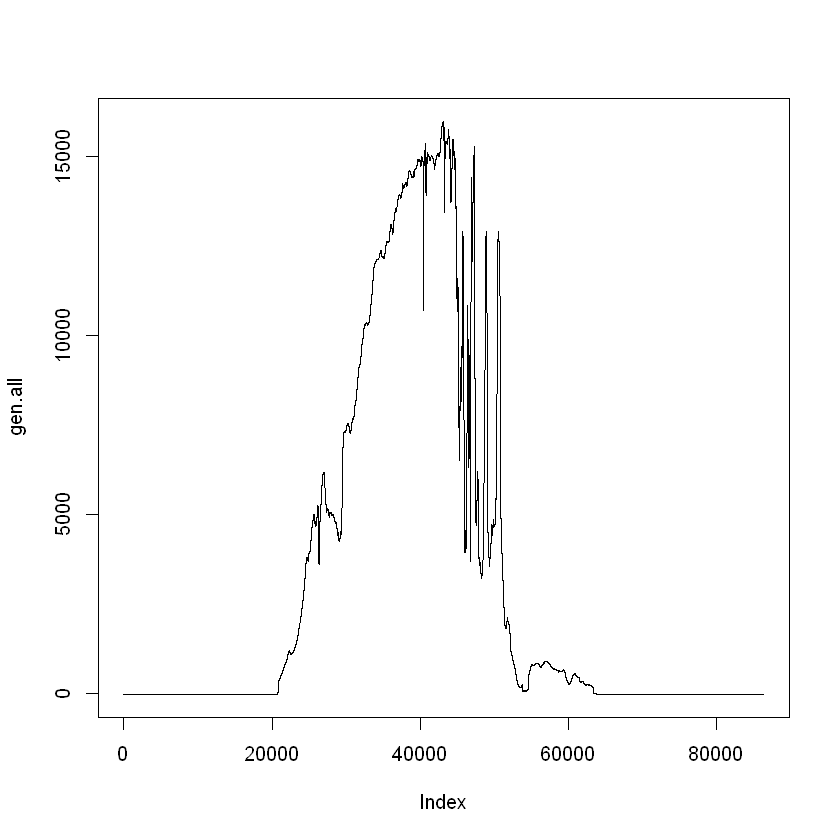

In [2]:
plot(cons.all,type='l')
plot(gen.all,type='l')

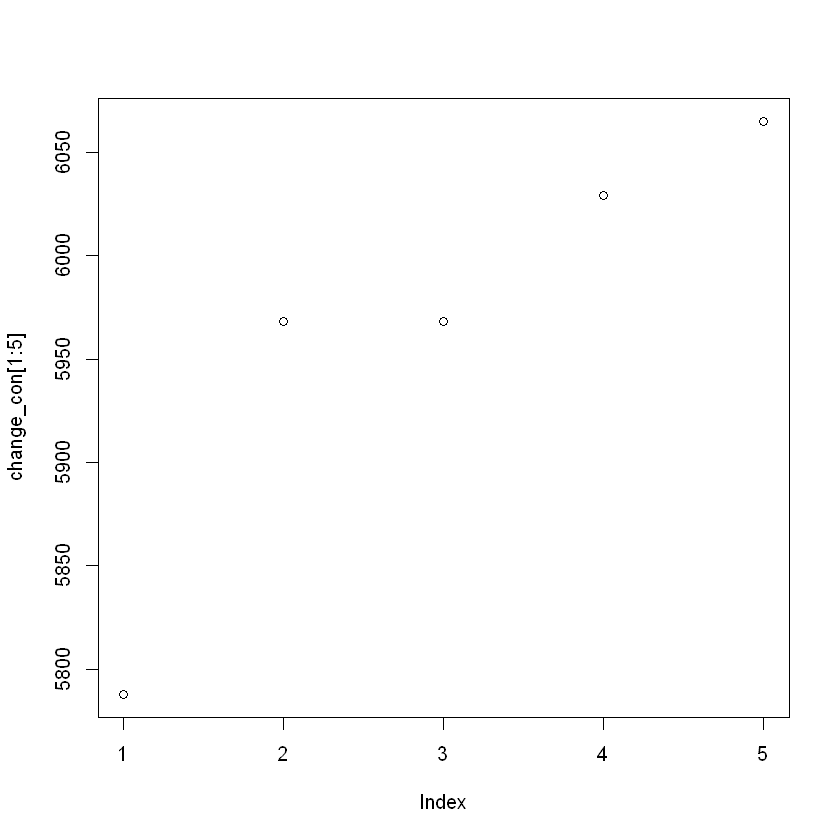

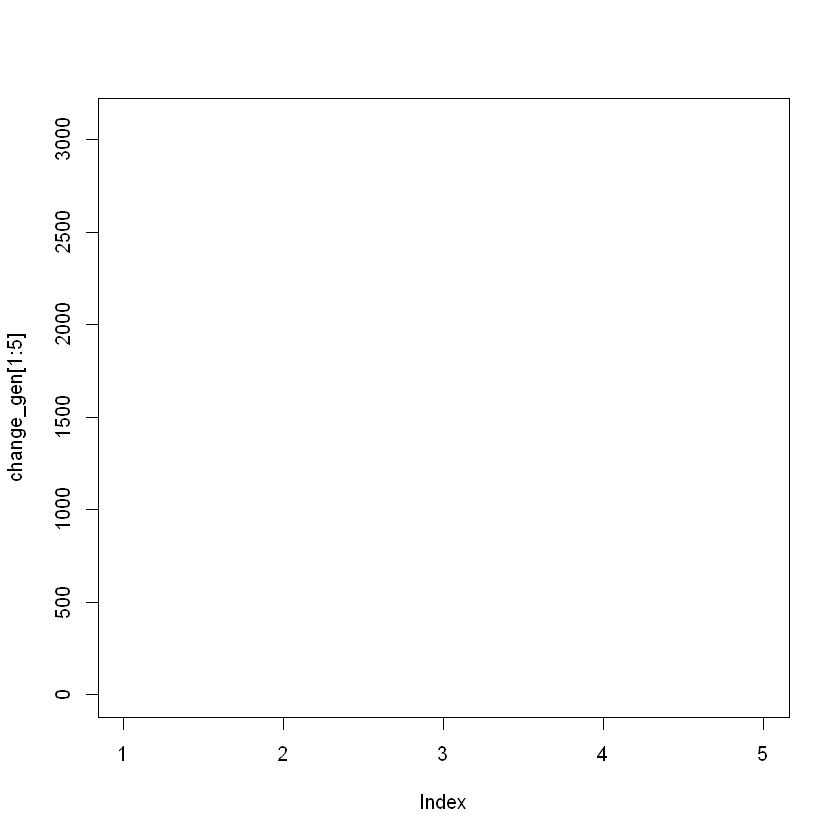

In [3]:
# Calcul del pitjor cas permetent el maxim consum solar
change_con = 0
change_gen = 0
for (i in 1:60)
{
  change_con = c(change_gen,max(diff(cons.all, lag = i)[-1], na.rm=TRUE))
  change_gen = c(change_gen,max(diff(gen.all, lag = i)[-1], na.rm=TRUE))
}
change_con = change_con[-1]
change_gen = change_gen[-1]

plot(change_con[1:5])
plot(change_gen[1:5],ylim = c(0,3100))

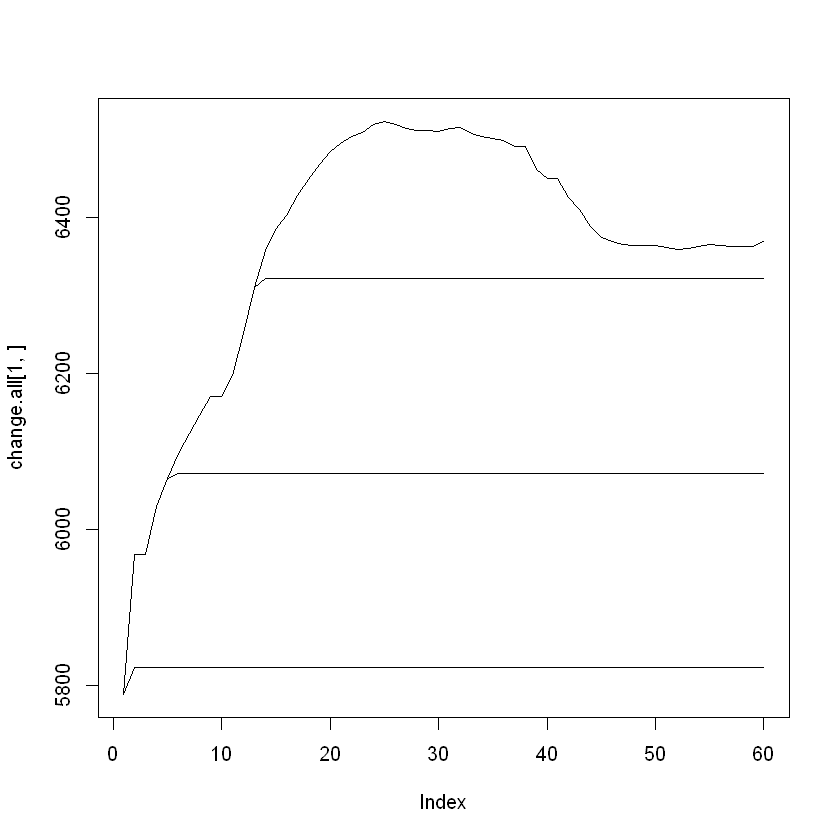

In [4]:
# ------------------------------------------------------------------------------ #
# If we are curtailing PV gen - what's the max POS change within 1 min scope ??? #
# ------------------------------------------------------------------------------ #


# Model Relació entre caiguda i potencia maxima 
n = 60
k = 0
from.pv = 20000
to.pv = 500
by.pv = -250

change.all <- matrix(0,length(seq(from = from.pv, to = to.pv, by =by.pv))*n,ncol = n, nrow = length(seq(from = from.pv, to = to.pv, by =by.pv)))
for (pv_curtail in seq(from = from.pv, to = to.pv, by =by.pv)){
  
  k = k+1
  gen.all.curt = pmin(gen.all,pv_curtail)
  
  change_gen.curt = 0
  for (i in 1:60)
  {
    change_gen.curt = c(change_gen.curt,max(diff(gen.all.curt, lag = i)[-1]))
  }
  change_gen.curt = change_gen.curt[-1]
  
  change.all[k,] <- change_gen.curt[1:n]
} 

plot(change.all[1,],type = "l", col = 1)
for (i in 2:length(seq(from = from.pv, to = to.pv, by =by.pv))){
  lines(change.all[i,])
}

In [5]:
# writeMat( change_gen_all_pos = change.all,change_con_pos = change_con[1:n],pv_curtail = seq(from = from.pv, to = to.pv, by =by.pv) ,con = 'Fitxers_resultats/M_change_pos.mat')
writeMat( change_gen_all_pos = change.all,change_con_pos = change_con[1:n],pv_curtail = seq(from = from.pv, to = to.pv, by =by.pv) ,con = '../../Data/Generated Data/3 - Changes/M_change_pos.mat')